In [1]:
import pandas as pd
import datetime
import io
import requests
from time import sleep
from matplotlib import pyplot as plt
from bs4 import BeautifulSoup

In [2]:
days = 30   ## Edit this
period = pd.date_range(end=(datetime.date.today() - datetime.timedelta(days=1)), periods=days, freq='B')

In [3]:
holidays = ["04-Mar-2019",
            "21-Mar-2019",
            "17-Apr-2019",
            "19-Apr-2019",
            "29-Apr-2019",
            "01-May-2019",
            "05-Jun-2019",
            "12-Aug-2019",
            "5-Aug-2019",
            "2-Sep-2019",
            "10-Sep-2019",
            "02-Oct-2019",
            "08-Oct-2019",
            "21-Oct-2019",
            "28-Oct-2019",
            "12-Nov-2019",
            "25-Dec-2019",
            "February 19 2020",
            "February 21 2020",
            "March 10 2020",
            "March 25 2020",
            "April 01 2020",
            "April 02 2020",
            "April 06 2020",
            "April 10 2020",
            "April 14 2020",
            "May 01 2020",
            "May 07 2020",
            "May 25 2020",
            "October 02 2020",
            "October 30 2020",
            "November 16 2020",
            "November 30 2020",
            "December 25 2020"]

In [4]:
from dateutil.parser import parse
public_holidays = []
for i in range(len(holidays)):
    public_holidays.append(parse(holidays[i], fuzzy=True))

In [5]:
public_holidays = pd.to_datetime(public_holidays)

In [6]:
working_days = period.difference(public_holidays)

In [7]:
urls = []
weight_stock = []
for i in range(working_days.size):
    append_date = working_days.date[i].strftime("%d%m%y")
    urls.append("https://www1.nseindia.com/content/indices/top10nifty50_"+append_date+".csv")
    file = requests.get(urls[i]).content
    file = pd.read_csv(io.StringIO(file.decode('utf-8')))
    weight_stock.append(float(file.loc[file["SYMBOL"]=="HDFCBANK"]["WEIGHTAGE(%)"]))
    #sleep(0.1)

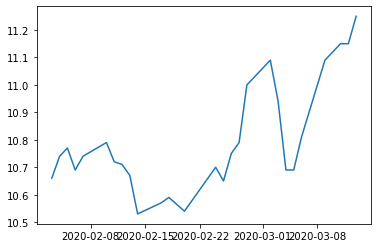

In [8]:
plt.plot(working_days,weight_stock)

In [9]:
URL = "https://www.bankbazaar.com/indian-holiday/nse-holidays.html"
headers = {"User-Agent" : "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/79.0.3945.130 Safari/537.36"}
page = requests.get(URL, headers=headers)
soup = BeautifulSoup(page.content, 'html.parser')

In [10]:
table = soup.find("table",{"class":"table table-bordered table-striped"})

In [11]:
rows = table.find_all('td')

In [12]:
dates = []
for i in range(len(rows)):
    if i%3 == 0:
        dates.append(rows[i+2].text)

In [13]:
dates= pd.to_datetime(dates)

In [14]:
dates

DatetimeIndex(['2020-01-26', '2020-02-21', '2020-04-06', '2020-04-10',
               '2020-04-14', '2020-05-07', '2020-07-31', '2020-08-12',
               '2020-08-15', '2020-08-29', '2020-10-02', '2020-10-25',
               '2020-10-29', '2020-11-14', '2020-11-30', '2020-12-25'],
              dtype='datetime64[ns]', freq=None)